In [1]:
import pandas as pd
import numpy as np

from tqdm import tqdm
tqdm.pandas()

from pathlib import Path
from utils import *
from plots import *

In [2]:
data_path = "data"

In [3]:
DataDownloader().download_all_csv()

In [4]:
covidpro_df = pd.read_csv(Path(data_path, CSVName.COVIDPRO_CSV))
dpc_regioni_df = pd.read_csv(Path(data_path, CSVName.DPC_REGIONI))
dpc_province_df = pd.read_csv(Path(data_path, CSVName.DPC_PROVINCE))

In [5]:
# Check if these replacements are needed
dpc_province_df.denominazione_provincia = dpc_province_df.denominazione_provincia.str.replace("Forlì-Cesena", "Forli-Cesena")
dpc_regioni_df.denominazione_regione = dpc_regioni_df.denominazione_regione.str.replace("P.A. Trento", "Trentino Alto Adige").replace("P.A. Bolzano", "Trentino Alto Adige")
covidpro_df.Region = covidpro_df.Region.str.replace("P.A. Trento", "Trentino Alto Adige").replace("P.A. Bolzano", "Trentino Alto Adige")

In [6]:
covidpro_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25389 entries, 0 to 25388
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_prov         25389 non-null  int64 
 1   Province        25389 non-null  object
 2   Date            25389 non-null  object
 3   Deaths          25389 non-null  int64 
 4   Tot_deaths      25389 non-null  int64 
 5   New_cases       25389 non-null  int64 
 6   Curr_pos_cases  25389 non-null  int64 
 7   Region          25389 non-null  object
 8   id_reg          25389 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 1.7+ MB


In [7]:
covidpro_df.head()

,id_prov,Province,Date,Deaths,Tot_deaths,New_cases,Curr_pos_cases,Region,id_reg
0,84,Agrigento,2020-02-24,0,0,0,0,Sicilia,19
1,6,Alessandria,2020-02-24,0,0,0,0,Piemonte,1
2,42,Ancona,2020-02-24,0,0,0,0,Marche,11
3,7,Aosta,2020-02-24,0,0,0,0,Valle d'Aosta,2
4,51,Arezzo,2020-02-24,0,0,0,0,Toscana,9


In [8]:
covidpro_df.tail()

,id_prov,Province,Date,Deaths,Tot_deaths,New_cases,Curr_pos_cases,Region,id_reg
25384,2,Vercelli,2020-11-28,0,293,74,6270,Piemonte,1
25385,23,Verona,2020-11-28,0,547,826,26622,Veneto,5
25386,102,Vibo Valentia,2020-11-28,0,17,6,942,Calabria,18
25387,24,Vicenza,2020-11-28,0,469,602,25063,Veneto,5
25388,56,Viterbo,2020-11-28,0,137,59,6894,Lazio,12


In [9]:
dpc_regioni_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5859 entries, 0 to 5858
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   data                          5859 non-null   object 
 1   stato                         5859 non-null   object 
 2   codice_regione                5859 non-null   int64  
 3   denominazione_regione         5859 non-null   object 
 4   lat                           5859 non-null   float64
 5   long                          5859 non-null   float64
 6   ricoverati_con_sintomi        5859 non-null   int64  
 7   terapia_intensiva             5859 non-null   int64  
 8   totale_ospedalizzati          5859 non-null   int64  
 9   isolamento_domiciliare        5859 non-null   int64  
 10  totale_positivi               5859 non-null   int64  
 11  variazione_totale_positivi    5859 non-null   int64  
 12  nuovi_positivi                5859 non-null   int64  
 13  dim

In [10]:
dpc_regioni_df.head()

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,...,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,0,0,0,0,NaN,NaN,0,5,NaN,NaN
1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,...,0,0,0,0,NaN,NaN,0,0,NaN,NaN
2,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,...,0,0,0,0,NaN,NaN,0,1,NaN,NaN
3,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,...,0,0,0,0,NaN,NaN,0,10,NaN,NaN
4,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,...,0,18,0,0,NaN,NaN,18,148,NaN,NaN


In [11]:
dpc_regioni_df.tail()

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,...,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note
5854,2020-11-28T17:00:00,ITA,19,Sicilia,38.115697,13.362357,1519,247,1766,38116,...,799,1189,20181,1461,37424.0,24100.0,61524,942356,644441.0,NaN
5855,2020-11-28T17:00:00,ITA,9,Toscana,43.769231,11.255889,1593,279,1872,43200,...,-1459,1196,54005,2563,77917.0,23723.0,101640,1543449,948551.0,NaN
5856,2020-11-28T17:00:00,ITA,10,Umbria,43.106758,12.388247,351,64,415,8238,...,-397,348,14388,389,6545.0,16885.0,23430,412818,223404.0,NaN
5857,2020-11-28T17:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,130,14,144,1321,...,-82,72,4641,310,5714.0,702.0,6416,59088,33335.0,NaN
5858,2020-11-28T17:00:00,ITA,5,Veneto,45.434905,12.338452,2654,309,2963,75609,...,1684,3498,58756,3644,36159.0,104813.0,140972,2769213,1055933.0,Tamponi antigenici 938224 numero di soggetti c...


In [12]:
dpc_regioni_df.tail().T

,5854,5855,5856,5857,5858
data,2020-11-28T17:00:00,2020-11-28T17:00:00,2020-11-28T17:00:00,2020-11-28T17:00:00,2020-11-28T17:00:00
stato,ITA,ITA,ITA,ITA,ITA
codice_regione,19,9,10,2,5
denominazione_regione,Sicilia,Toscana,Umbria,Valle d'Aosta,Veneto
lat,38.1157,43.7692,43.1068,45.7375,45.4349
long,13.3624,11.2559,12.3882,7.32015,12.3385
ricoverati_con_sintomi,1519,1593,351,130,2654
terapia_intensiva,247,279,64,14,309
totale_ospedalizzati,1766,1872,415,144,2963
isolamento_domiciliare,38116,43200,8238,1321,75609


In [13]:
dpc_province_df.head()

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note
0,2020-02-24T18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0,NaN
1,2020-02-24T18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0,NaN
2,2020-02-24T18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0,NaN
3,2020-02-24T18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0,NaN
4,2020-02-24T18:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,NaN,NaN,NaN,0,NaN


In [14]:
dpc_province_df.tail()

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note
39004,2020-11-28T17:00:00,ITA,5,Veneto,27,Venezia,VE,45.434905,12.338452,20398,NaN
39005,2020-11-28T17:00:00,ITA,5,Veneto,28,Padova,PD,45.406930,11.876087,26722,NaN
39006,2020-11-28T17:00:00,ITA,5,Veneto,29,Rovigo,RO,45.071073,11.790070,3774,NaN
39007,2020-11-28T17:00:00,ITA,5,Veneto,899,Fuori Regione / Provincia Autonoma,NaN,NaN,NaN,2378,NaN
39008,2020-11-28T17:00:00,ITA,5,Veneto,999,In fase di definizione/aggiornamento,NaN,NaN,NaN,346,NaN


In [15]:
dpc_province_df['data'] = pd.to_datetime(dpc_province_df['data'])
dpc_regioni_df['data'] = pd.to_datetime(dpc_regioni_df['data'])
covidpro_df['Date'] = pd.to_datetime(covidpro_df['Date'])

In [16]:
# Ratio of positives over tampons
dpc_regioni_df['NC_R'] = dpc_regioni_df['nuovi_positivi']/dpc_regioni_df['tamponi']

# Ratio of new positives over total positives
dpc_regioni_df['NP_R'] = dpc_regioni_df['nuovi_positivi']/dpc_regioni_df['totale_positivi']

# Ratio of Itensive care over total cases
dpc_regioni_df['IC_R'] = dpc_regioni_df['terapia_intensiva']/dpc_regioni_df['totale_positivi']

# Ratio of hospitalized over total cases
dpc_regioni_df['Hosp_R'] = dpc_regioni_df['totale_ospedalizzati']/dpc_regioni_df['totale_positivi']

# Ratio of dead people over total cases
dpc_regioni_df['DR'] = dpc_regioni_df['deceduti']/dpc_regioni_df['totale_positivi']

In [17]:
covidpro_df['New_cases'] = covidpro_df['New_cases'].apply(lambda x: 0 if x is np.NaN or x < 0 else x)
covidpro_df['Deaths'] = covidpro_df['Deaths'].apply(lambda x: 0 if x is np.NaN or x < 0 else x)

In [18]:
def compute_ratio(x):
    if x['Curr_pos_cases'] == 0:
        return 0
    else:
        return x['New_cases']/x['Curr_pos_cases']

In [19]:
# Ratio of positives over total cases
covidpro_df['NP_R'] = covidpro_df.progress_apply(compute_ratio, axis=1)

100%|██████████| 25389/25389 [00:00<00:00, 47018.64it/s]


In [20]:
def compute_ratio(x):
    if x['Curr_pos_cases'] == 0:
        return 0
    else:
        return x['Deaths']/x['Curr_pos_cases']

In [21]:
# Ratio of dead people over total cases
covidpro_df['DR'] = covidpro_df.progress_apply(compute_ratio, axis=1)

100%|██████████| 25389/25389 [00:00<00:00, 44790.93it/s]


In [22]:
dpc_regioni_df['NC_R_Rolling'] = dpc_regioni_df['NC_R'].rolling(window=7).mean()
dpc_regioni_df['IC_R_Rolling'] = dpc_regioni_df['IC_R'].rolling(window=7).mean()
dpc_regioni_df['totale_positivi_Rolling'] = dpc_regioni_df['totale_positivi'].rolling(window=7).mean()

covidpro_df['NP_R_Rolling'] = covidpro_df['NP_R'].rolling(window=7).mean()
covidpro_df['DR_Rolling'] = covidpro_df['DR'].rolling(window=7).mean()

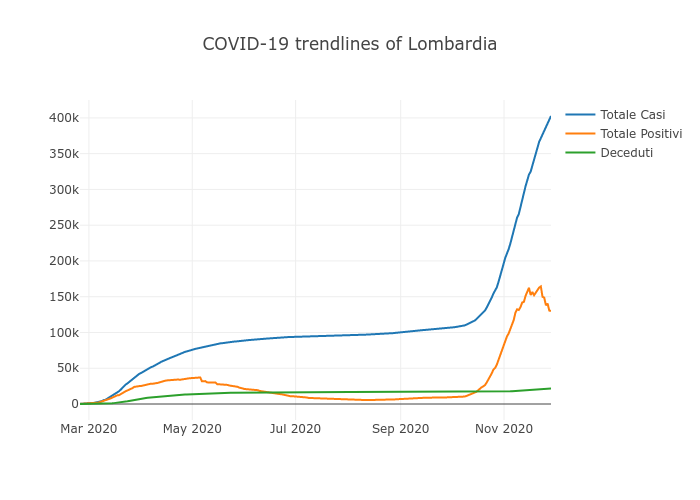

In [23]:
inter_dropdown_plot(options=dpc_regioni_df.denominazione_regione.unique(), 
                    default_value='Lombardia', 
                    dropdown_label='Regione',
                    y=['totale_casi', 'totale_positivi', 'deceduti'],
                    legend_titles=['Totale Casi', 'Totale Positivi', 'Deceduti'],
                    data=dpc_regioni_df,
                    group_column='denominazione_regione',
                    x='data',
                    title='COVID-19 trendlines of ',
                    xtitle='Data',
                    ytitle='Unità',
                    output_image=True)

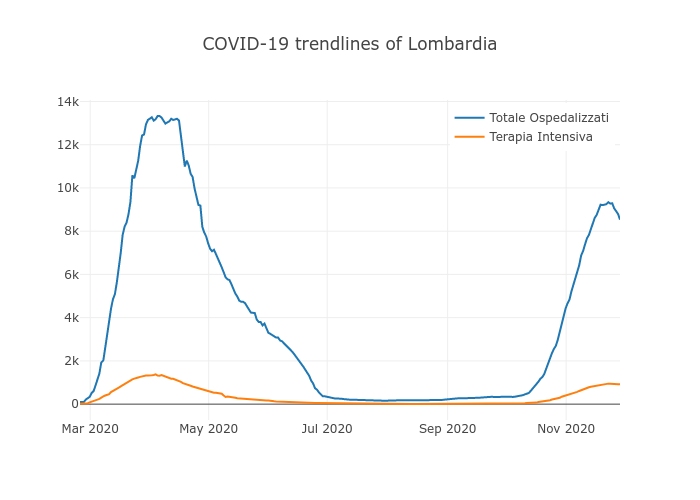

In [24]:
inter_dropdown_plot(options=dpc_regioni_df.denominazione_regione.unique(), 
                    default_value='Lombardia', 
                    dropdown_label='Regione',
                    y=['totale_ospedalizzati', 'terapia_intensiva'],
                    legend_titles=['Totale Ospedalizzati', 'Terapia Intensiva'],
                    data=dpc_regioni_df,
                    group_column='denominazione_regione',
                    x='data',
                    title='COVID-19 trendlines of ',
                    xtitle='Data',
                    ytitle='Unità',
                    output_image=True,
                    blend_legend=True)

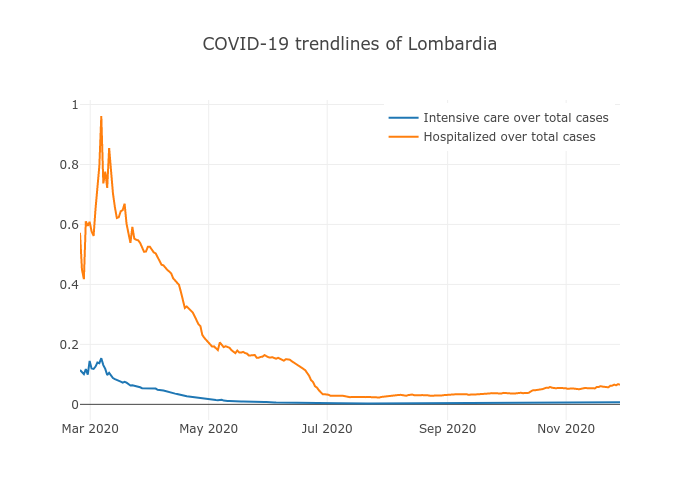

In [25]:
inter_dropdown_plot(options=dpc_regioni_df.denominazione_regione.unique(), 
                    default_value='Lombardia', 
                    dropdown_label='Regione',
                    y=['IC_R', 'Hosp_R'],
                    legend_titles=['Intensive care over total cases', 'Hospitalized over total cases'],
                    data=dpc_regioni_df,
                    group_column='denominazione_regione',
                    x='data',
                    title='COVID-19 trendlines of ',
                    xtitle='Data',
                    ytitle='Frazione',
                    output_image=True,
                    blend_legend=True)

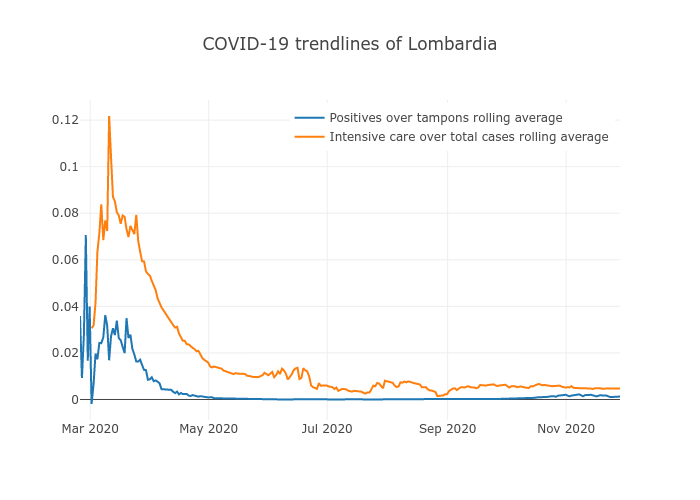

In [27]:
inter_dropdown_plot(options=dpc_regioni_df.denominazione_regione.unique(), 
                    default_value='Lombardia', 
                    dropdown_label='Regione',
                    y=['NC_R_Rolling', 'IC_R_Rolling'],
                    legend_titles=['Positives over tampons rolling average', 'Intensive care over total cases rolling average'],
                    data=dpc_regioni_df,
                    group_column='denominazione_regione',
                    x='data',
                    title='COVID-19 trendlines of ',
                    xtitle='Data',
                    ytitle='Frazione',
                    output_image=True,
                    blend_legend=True)

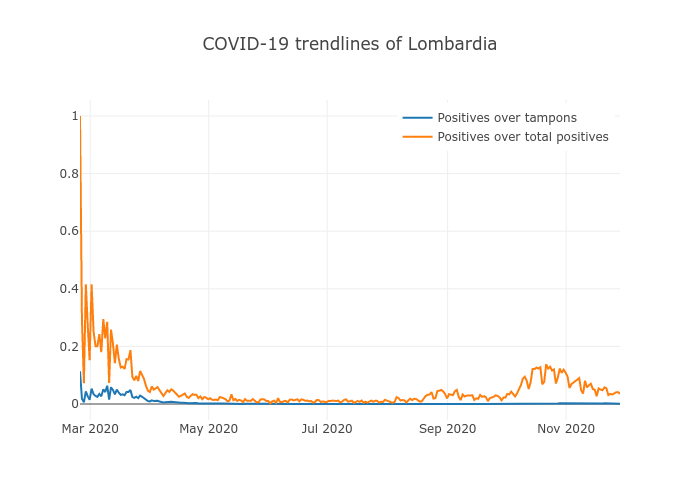

In [26]:
inter_dropdown_plot(options=dpc_regioni_df.denominazione_regione.unique(), 
                    default_value='Lombardia', 
                    dropdown_label='Regione',
                    y=['NC_R', 'NP_R'],
                    legend_titles=['Positives over tampons', 'Positives over total positives'],
                    data=dpc_regioni_df,
                    group_column='denominazione_regione',
                    x='data',
                    title='COVID-19 trendlines of ',
                    xtitle='Data',
                    ytitle='Frazione',
                    output_image=True,
                    blend_legend=True)

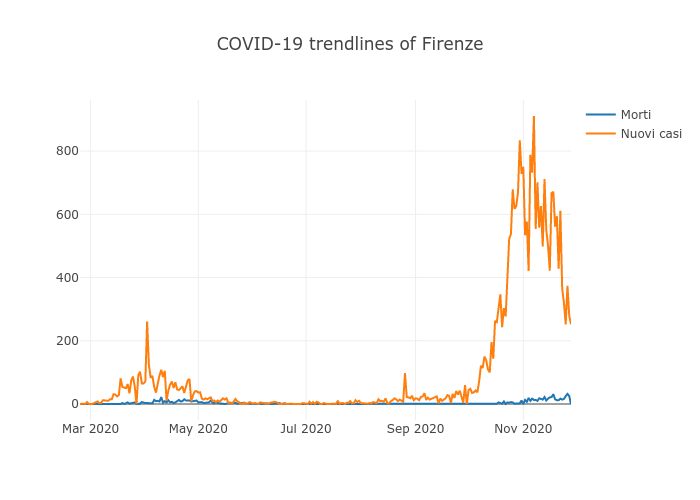

In [28]:
inter_dropdown_plot(options=covidpro_df['Province'].unique(), 
                    default_value='Firenze', 
                    dropdown_label='Provincia',
                    y=['Deaths', 'New_cases'],
                    legend_titles=['Morti', 'Nuovi casi'],
                    data=covidpro_df,
                    group_column='Province',
                    x='Date',
                    title='COVID-19 trendlines of ',
                    xtitle='Data',
                    ytitle='Unità',
                    output_image=True,
                    blend_legend=False)

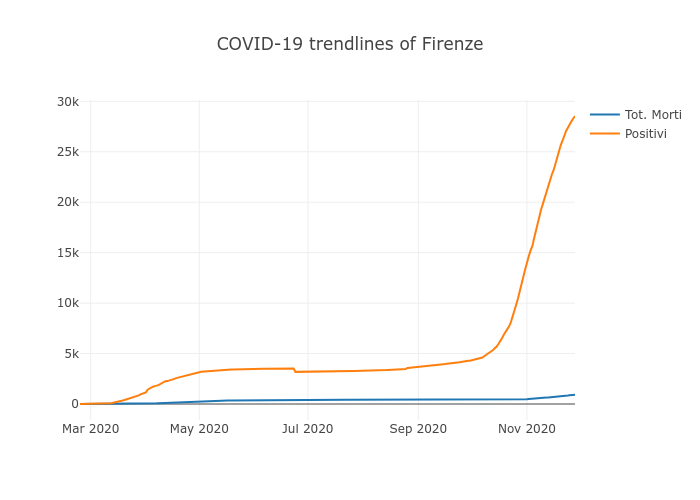

In [29]:
inter_dropdown_plot(options=covidpro_df.Province.unique(), 
                    default_value='Firenze', 
                    dropdown_label='Provincia',
                    y=['Tot_deaths', 'Curr_pos_cases'],
                    legend_titles=['Tot. Morti', 'Positivi'],
                    data=covidpro_df,
                    group_column='Province',
                    x='Date',
                    title='COVID-19 trendlines of ',
                    xtitle='Data',
                    ytitle='Unità',
                    output_image=True,
                    blend_legend=False)

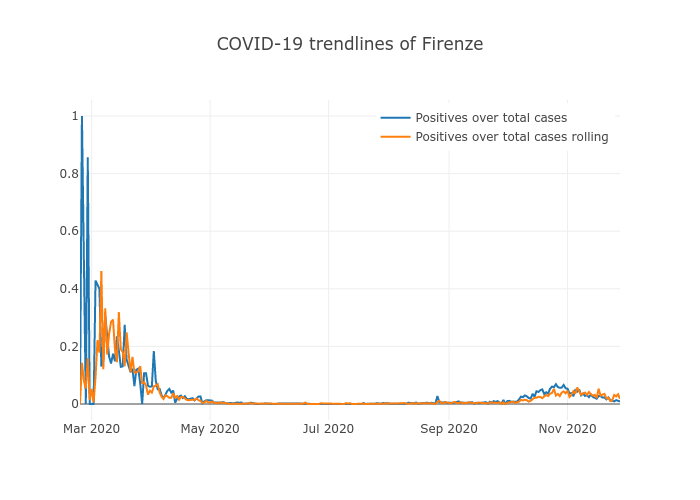

In [30]:
inter_dropdown_plot(options=covidpro_df['Province'].unique(), 
                    default_value='Firenze', 
                    dropdown_label='Provincia',
                    y=['NP_R', 'NP_R_Rolling'],
                    legend_titles=['Positives over total cases', 'Positives over total cases rolling'],
                    data=covidpro_df,
                    group_column='Province',
                    x='Date',
                    title='COVID-19 trendlines of ',
                    xtitle='Data',
                    ytitle='Unità',
                    output_image=True,
                    blend_legend=True)

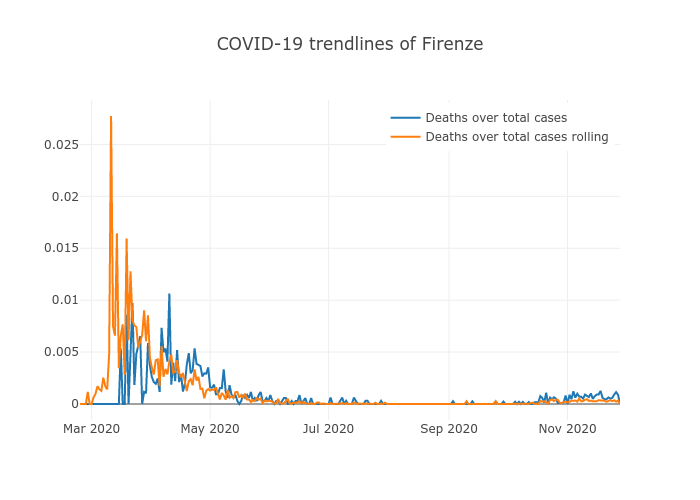

In [31]:
inter_dropdown_plot(options=covidpro_df['Province'].unique(), 
                    default_value='Firenze', 
                    dropdown_label='Provincia',
                    y=['DR', 'DR_Rolling'],
                    legend_titles=['Deaths over total cases', 'Deaths over total cases rolling'],
                    data=covidpro_df,
                    group_column='Province',
                    x='Date',
                    title='COVID-19 trendlines of ',
                    xtitle='Data',
                    ytitle='Unità',
                    output_image=True,
                    blend_legend=True)